In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, stratify = cancer.target, random_state = 42)

In [5]:
from sklearn.linear_model import LogisticRegression

In [7]:
logreg = LogisticRegression(solver='liblinear').fit(X_train,y_train)

In [8]:
print(logreg.score(X_train,y_train))
print(logreg.score(X_test,y_test))

0.9553990610328639
0.958041958041958


In [9]:
logreg100 = LogisticRegression(C=100,solver='liblinear').fit(X_train,y_train)
print(logreg100.score(X_train,y_train))
print(logreg100.score(X_test,y_test))

0.9671361502347418
0.965034965034965


In [11]:
logreg001 = LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)
print(logreg001.score(X_train,y_train))
print(logreg001.score(X_test,y_test))

0.9342723004694836
0.9300699300699301


In [15]:
for C, market in zip([0.001,1,100],['o','^','v']):
    lr_l1=LogisticRegression(penalty='l1',max_iter=1000,solver='liblinear',C=C).fit(X_train,y_train)
    print('C={:.3f} train truth: {:.2f}'.format(C,lr_l1.score(X_train,y_train)))
    print('C={:.3f} test truth: {:.2f}'.format(C,lr_l1.score(X_test,y_test)))

C=0.001 train truth: 0.91
C=0.001 test truth: 0.92
C=1.000 train truth: 0.96
C=1.000 test truth: 0.96
C=100.000 train truth: 0.99
C=100.000 test truth: 0.98


In [16]:
from sklearn.datasets import make_blobs

In [17]:
import mglearn

In [18]:
%matplotlib inline

In [19]:
X,y=make_blobs(random_state = 42)

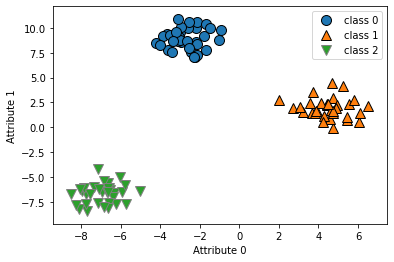

In [20]:
import matplotlib.pyplot as plt
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('Attribute 0')
plt.ylabel('Attribute 1')
plt.legend(['class 0','class 1','class 2'])

In [21]:
from sklearn.svm import LinearSVC

In [22]:
linear_svm = LinearSVC().fit(X,y)

In [23]:
linear_svm.coef_

array([[-0.17492399,  0.23140996],
       [ 0.47621913, -0.06937284],
       [-0.18914461, -0.20399751]])

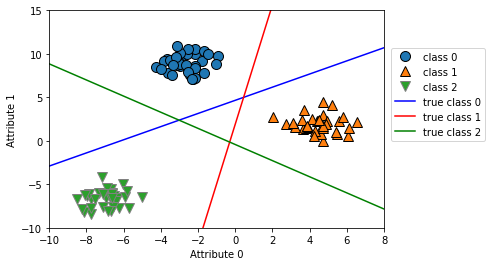

In [27]:
import numpy as np
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel('Attribute 0')
plt.ylabel('Attribute 1')
plt.legend(['class 0','class 1','class 2','true class 0','true class 1', 'true class 2'],
          loc=(1.02,0.4))